<a href="https://colab.research.google.com/github/EricCallaway/ML_Assignment_03_CNN/blob/main/ML_Assignment_03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np



In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataset_path = '/content/drive/MyDrive/Data/ML_HW#3_Dataset/CNN_dataset/'
train_folder = dataset_path + 'Training/'
test_folder = dataset_path + 'Test/'

In [ ]:
for category in os.listdir(train_folder):
  print(category)

In [ ]:
for category in os.listdir(test_folder):
  print(category)

Defining Batch Size, Height, and Width

In [10]:
batch_size = 32
HEIGHT = 180
WIDTH = 180

Defining validation split of 80/20. (80 - Training, 20 - Validation)

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  validation_split=0.2,
  subset="training",
  seed=1337,
  image_size=(HEIGHT, WIDTH),
  batch_size=batch_size)

Found 2633 files belonging to 20 classes.
Using 2107 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  validation_split=0.2,
  subset="validation",
  seed=1337,
  image_size=(HEIGHT, WIDTH),
  batch_size=batch_size)

Found 2633 files belonging to 20 classes.
Using 526 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['Afghan_hound', 'Basset', 'Beagle', 'Black-and-tan_coonhound', 'Blenheim_spaniel', 'Bloodhound', 'Bluetick', 'Borzoi', 'Chihuahua', 'English_foxhound', 'Irish_wolfhound', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Redbone', 'Rhodesian_ridgeback', 'Shih-Tzu', 'Toy_terrier', 'Walker_hound', 'papillon']


Visualizing the first nine images of the dataset.

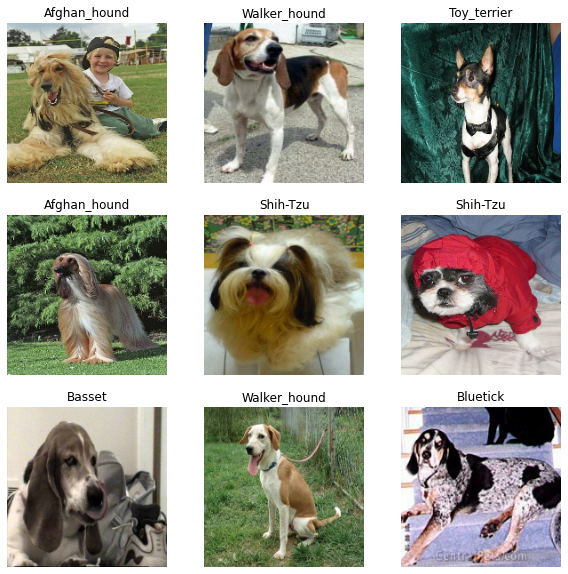

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Below shows the shape of the Tensors. The `imgage_batch` shape is a batch of 32 images, with a shape of `180x180x3` (height, width, #of channels) The number of channels is 3 because they are RGB value images. 

Note: There is an option here to call `.numpy()` to convert the tensors into a `numpy.ndarray`

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Standardizing the Data.

Since our images are in RGB format, they are on the scale of [0,255]. This is not ideal for a neural network, so we will standardize the values in a range of [0,1]

In [17]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [20]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


Here we are caching and prefetching batches in order to fully utilize our CPU and GPU. This will help reduce the amount of time it takes to train the model.

In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Training the model.

In [22]:
num_classes = 20

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

Define optimization for the model

In [23]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Fit the model

In [24]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
66/66 [==============================] - 256s 4s/step - loss: 2.9962 - accuracy: 0.0717 - val_loss: 2.9477 - val_accuracy: 0.0951
Epoch 2/3
66/66 [==============================] - 83s 1s/step - loss: 2.8604 - accuracy: 0.1258 - val_loss: 2.7444 - val_accuracy: 0.1977
Epoch 3/3
66/66 [==============================] - 83s 1s/step - loss: 2.5426 - accuracy: 0.2069 - val_loss: 2.7141 - val_accuracy: 0.1958
